In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


#### Emp_id is not a useful feature for us so will drop this in future.
#### There are total 5 object type data and 9 numerical data type features.
#### Department feature has 9 unique features and out of which Sales and Marketting has high number of observation which means that majority of Employee are from sales and marketting dept who are appicable for getting promotions.
#### Majority of employee were belong to region_2 and they are male.
#### Employee who are applicable for promotion were not hired by the company directly that is they were hired from other recruitment channels.

## EDA

### Checking NULL | Missing values 

In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Education and previous year rating features contains missing values.

In [9]:
round(df.isnull().sum().sum() / len(df) * 100, 2)

11.92

#### Since, total missing values precentage is greater than 3% as per industry. Hence, we will fill missing values with some significant values.

In [10]:
df['education'].fillna(method='ffill', inplace=True)
df['previous_year_rating'].fillna(method='ffill', inplace=True)

In [11]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### We fill all the missing values and now our dataset doesn't contain missing values. 

### Checking Duplicate values.

In [12]:
df.duplicated().sum()

0

#### Hence, our dataset doesn't have duplicate values.

In [13]:
# Now we will make a copy our data set for further work.

In [14]:
df_copy = df.copy()

In [15]:
df_copy.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### Now will drop employee_id from our dataset.

In [16]:
df.drop('employee_id', axis=1, inplace=True)

In [17]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Checking Zeroes Percentage in the dataset.

In [18]:
def zero_percent(data, feature_name):
    print("Zeroes Percentage: {}% in {}".format(round(data.value_counts(normalize=True)[0], 2),i)) if 0 in data.value_counts() else print(f'Absense of Zeroes in the {feature_name}')

In [19]:
for i in df.columns:
    if df[i].dtype != 'object':
        zero_percent(df[i], i)

Absense of Zeroes in the no_of_trainings
Absense of Zeroes in the age
Absense of Zeroes in the previous_year_rating
Absense of Zeroes in the length_of_service
Zeroes Percentage: 0.65% in KPIs_met >80%
Zeroes Percentage: 0.98% in awards_won?
Absense of Zeroes in the avg_training_score
Zeroes Percentage: 0.91% in is_promoted


#### Hence, awards_won? and KPIs_met>80% have presence of high frequency of 0 values which is because of some employee doesn't won awards and met the KPI percentage.

### Checking Correlation between features present in the dataset.

In [20]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.059071,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.005443,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.059071,0.005443,1.000000,0.000260,0.326132,0.026073,0.069003,0.146150
length_of_service,-0.057275,0.657111,0.000260,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.326132,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.026073,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.069003,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.146150,-0.010670,0.221582,0.195871,0.181147,1.000000


#### Only age and length_of_service showing significant relationship whereas all the other features showing low but positive co-relationship like KPI_met showing weak relationship with is_promoted feature. We can conclude that no features were showing significant relationship rather than age and length of service.

In [21]:
pd.crosstab(df['department'], df['education']).apply(lambda x: round(x/x.sum()*100, 2))

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,11.02,0.48,7.17
Finance,5.01,12.63,3.25
HR,4.04,15.38,4.74
Legal,2.13,7.75,1.01
Operations,20.68,21.69,20.71
Procurement,11.56,15.38,16.50
R&D,1.46,0.12,2.80
Sales & Marketing,31.82,2.62,29.55
Technology,12.28,23.96,14.26


In [22]:
df[df['education'] == "Bachelor's"]['department'].value_counts(normalize=True)*100

Sales & Marketing    31.815577
Operations           20.682469
Technology           12.281844
Procurement          11.560302
Analytics            11.021099
Finance               5.011722
HR                    4.037510
Legal                 2.125554
R&D                   1.463923
Name: department, dtype: float64

#### Maximum Employee's who were applicable for promotion were from Sales and Marketting and Operations department. Also, Employee who have done graduation more than Bachelor's were more eligible for getting promotion.

In [23]:
round(df['gender'].value_counts(normalize=True)*100)

m    70.0
f    30.0
Name: gender, dtype: float64

#### Males were more eligible for getting promotion with respect to females as the number of applicant of female were very less that is 30% of total observations.

In [24]:
pd.crosstab(df['is_promoted'], df['gender']).apply(lambda x: round(x/x.sum()*100, 2))

gender,f,m
is_promoted,,
0,91.01,91.68
1,8.99,8.32


#### We can see that females gets significant promotions then males in respective of more males were applied for promotions wrt females. Hence, females checks all the required skills more than males.

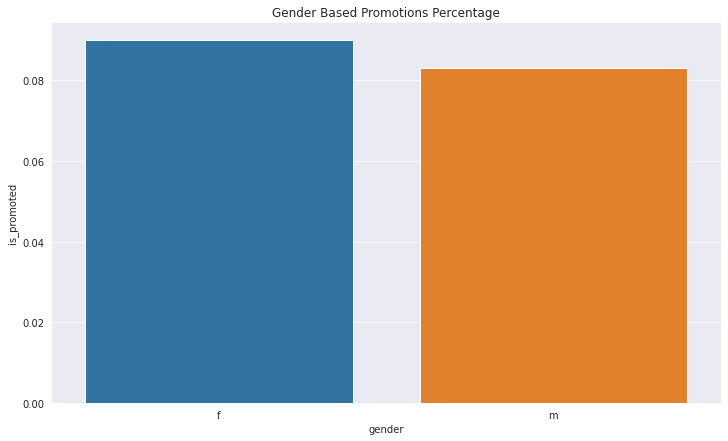

In [25]:
plt.figure(figsize=(12,7));
sns.barplot(df['gender'], df['is_promoted'], ci=False);
plt.title('Gender Based Promotions Percentage');

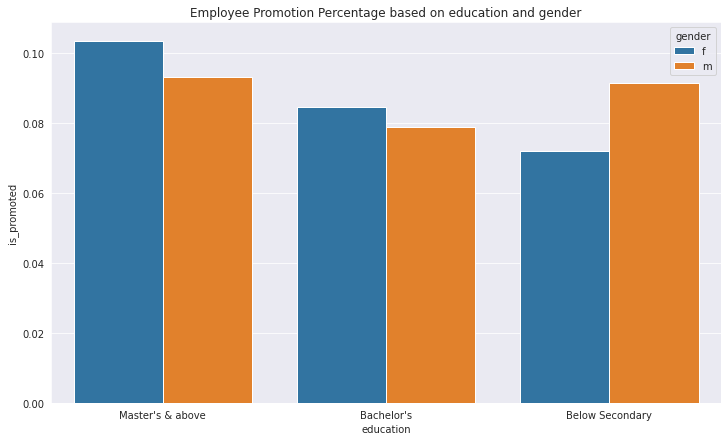

In [26]:
plt.figure(figsize=(12,7));
sns.barplot(df['education'], df['is_promoted'], ci=False, hue=df['gender']);
plt.title('Employee Promotion Percentage based on education and gender');

#### Clearly, Females over shadow or left behind males in getting promotion when they good education background. 
#### Males have high percentage in getting promotion when they have secondary or below education.

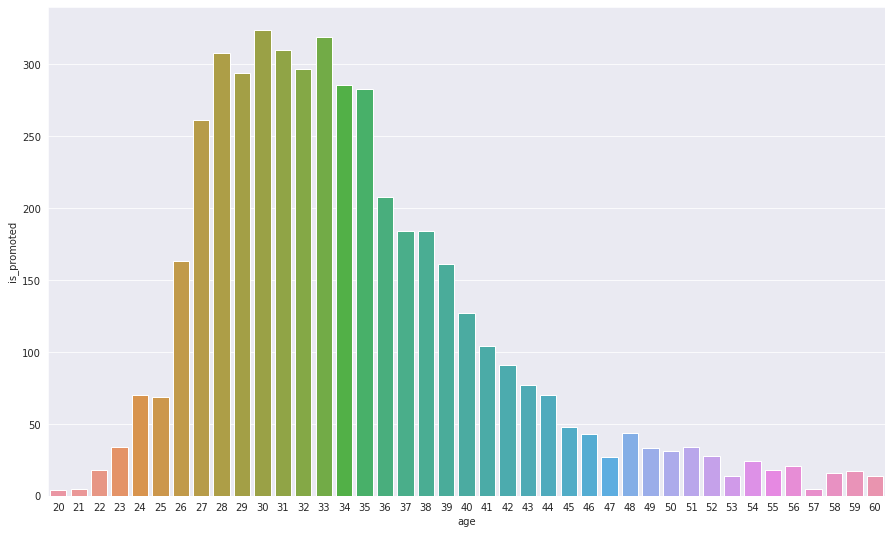

In [27]:
plt.figure(figsize=(15,9));
sns.barplot(df['age'], df['is_promoted'], orient='v', ci=None, estimator=np.sum);

In [28]:
df[['is_promoted', 'age']].groupby('age').sum().sort_values('is_promoted', ascending=False).head(1)

,is_promoted
age,
30,324


#### Maximum promoted employees are of age 30 which states that company highly promotes young minds more.

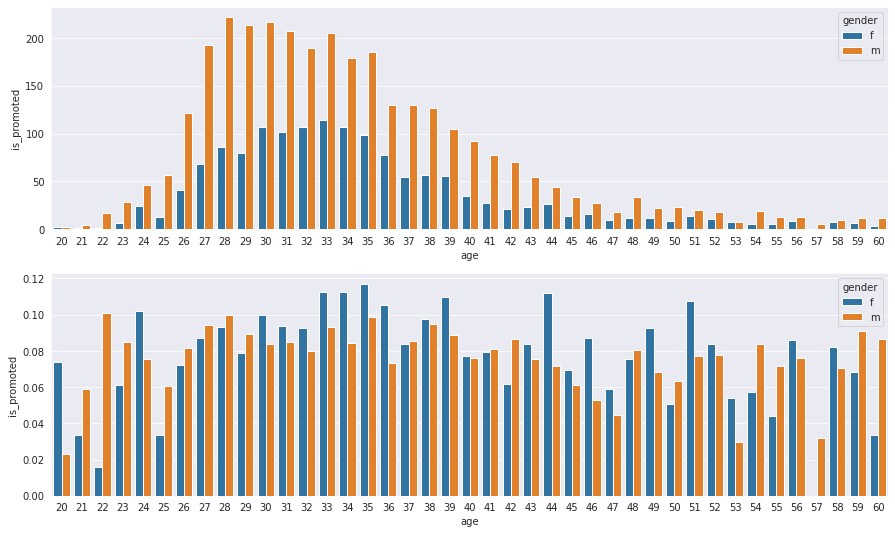

In [29]:
fig, axes = plt.subplots(2, figsize=(15,9))
sns.barplot(df['age'], df['is_promoted'], orient='v', ci=None, estimator=np.sum, hue=df['gender'], ax=axes[0]);
sns.barplot(df['age'], df['is_promoted'], orient='v', ci=None, estimator=np.mean, hue=df['gender'], ax=axes[1]);

#### We can clearly see that mostly in every age group male candidate apply or selected for more promotion than female candidate.
#### But, the average promotions rate of Female candidated is greater than males in every age group.

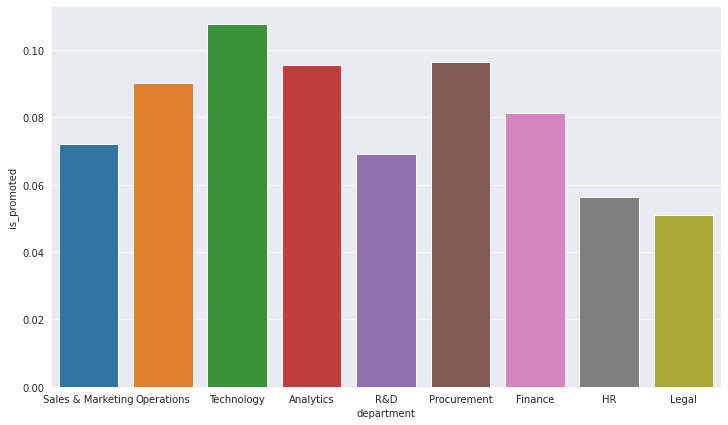

In [30]:
plt.figure(figsize=(12,7));
sns.barplot(df['department'], df['is_promoted'], ci=False, estimator=np.mean);

#### Employee from Technology and Procurement department grabs more promotions and Legal department employee grabs less promotions.